In [86]:
import json
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randrange
from nltk.corpus import stopwords
import string

## Tokenization and Stemming

In [2]:
ps = PorterStemmer()
with open('reviewSamples20.json') as f:
    data = json.loads("[" + 
        f.read().replace("}\n{", "},\n{") + 
    "]")

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
# Select random review and business_id
m = randrange(len(data))
business_id = data[m]['business_id']
business_id

'3fw2X5bZYeW9xCz_zGhOHg'

In [117]:
preStem = []
for j in range(len(data)):
    if(data[j]['business_id'] == business_id):
        text = str(data[j]['text']).lower()
        word = word_tokenize(text)
        preStem.extend(word)

In [118]:
filtered_preStem = [w for w in preStem if not w in string.punctuation]
print(filtered_preStem)

['tracy', 'dessert', 'had', 'a', 'big', 'name', 'in', 'hong', 'kong', 'and', 'the', 'one', 'in', 'first', 'markham', 'place', 'has', 'been', 'here', 'for', 'many', 'years', 'now', 'came', 'in', 'for', 'some', 'chinese', 'dessert', 'and', 'i', 'must', 'say', 'their', 'selection', 'has', 'increased', 'tremendously', 'over', 'the', 'years', 'i', 'might', 'as', 'well', 'add', 'that', 'the', 'price', 'has', 'also', 'increased', 'tremendously', 'as', 'well', 'the', 'waitress', 'gave', 'us', 'tea', 'which', 'i', 'could', 'taste', 'had', 'red', 'date', 'in', 'it', 'fancy', 'a', 'simple', 'taro', 'with', 'coconut', 'with', 'tapioca', 'pearls', 'was', 'like', '5.25', 'or', 'something', 'basically', 'all', 'the', 'desserts', 'were', 'more', 'than', '5', 'that', "'s", 'crazy', 'i', 'can', 'literally', 'just', 'make', 'this', 'dessert', 'at', 'home', 'and', 'for', 'a', 'bowl', 'it', 'would', 'probably', 'cost', 'like', '0.50', 'a', 'few', 'years', 'ago', 'i', 'think', 'i', 'can', 'still', 'get', 'i

In [119]:
# Stemming
stems = [ps.stem(w) for w in filtered_preStem]
print(stems)

['traci', 'dessert', 'had', 'a', 'big', 'name', 'in', 'hong', 'kong', 'and', 'the', 'one', 'in', 'first', 'markham', 'place', 'ha', 'been', 'here', 'for', 'mani', 'year', 'now', 'came', 'in', 'for', 'some', 'chines', 'dessert', 'and', 'i', 'must', 'say', 'their', 'select', 'ha', 'increas', 'tremend', 'over', 'the', 'year', 'i', 'might', 'as', 'well', 'add', 'that', 'the', 'price', 'ha', 'also', 'increas', 'tremend', 'as', 'well', 'the', 'waitress', 'gave', 'us', 'tea', 'which', 'i', 'could', 'tast', 'had', 'red', 'date', 'in', 'it', 'fanci', 'a', 'simpl', 'taro', 'with', 'coconut', 'with', 'tapioca', 'pearl', 'wa', 'like', '5.25', 'or', 'someth', 'basic', 'all', 'the', 'dessert', 'were', 'more', 'than', '5', 'that', "'s", 'crazi', 'i', 'can', 'liter', 'just', 'make', 'thi', 'dessert', 'at', 'home', 'and', 'for', 'a', 'bowl', 'it', 'would', 'probabl', 'cost', 'like', '0.50', 'a', 'few', 'year', 'ago', 'i', 'think', 'i', 'can', 'still', 'get', 'it', 'for', 'like', '3-', '4', 'which', 'is

In [120]:
freq_dist = FreqDist(filtered_preStem)
freq_dist = dict(freq_dist)
freq_dist = pd.Series(freq_dist)
freq_dist.sort_values(ascending=False, inplace=True)
freq_dist

the          11
a            10
i            10
for           7
dessert       6
             ..
here          1
literally     1
crazy         1
's            1
finished      1
Length: 147, dtype: int64

In [121]:
stemmed_freq_dist = FreqDist(stems)
stemmed_freq_dist = dict(stemmed_freq_dist)
stemmed_freq_dist = pd.Series(stemmed_freq_dist)
stemmed_freq_dist.sort_values(ascending=False, inplace=True)
stemmed_freq_dist

the        11
i          10
a          10
dessert     7
for         7
           ..
make        1
liter       1
now         1
crazi       1
finish      1
Length: 144, dtype: int64

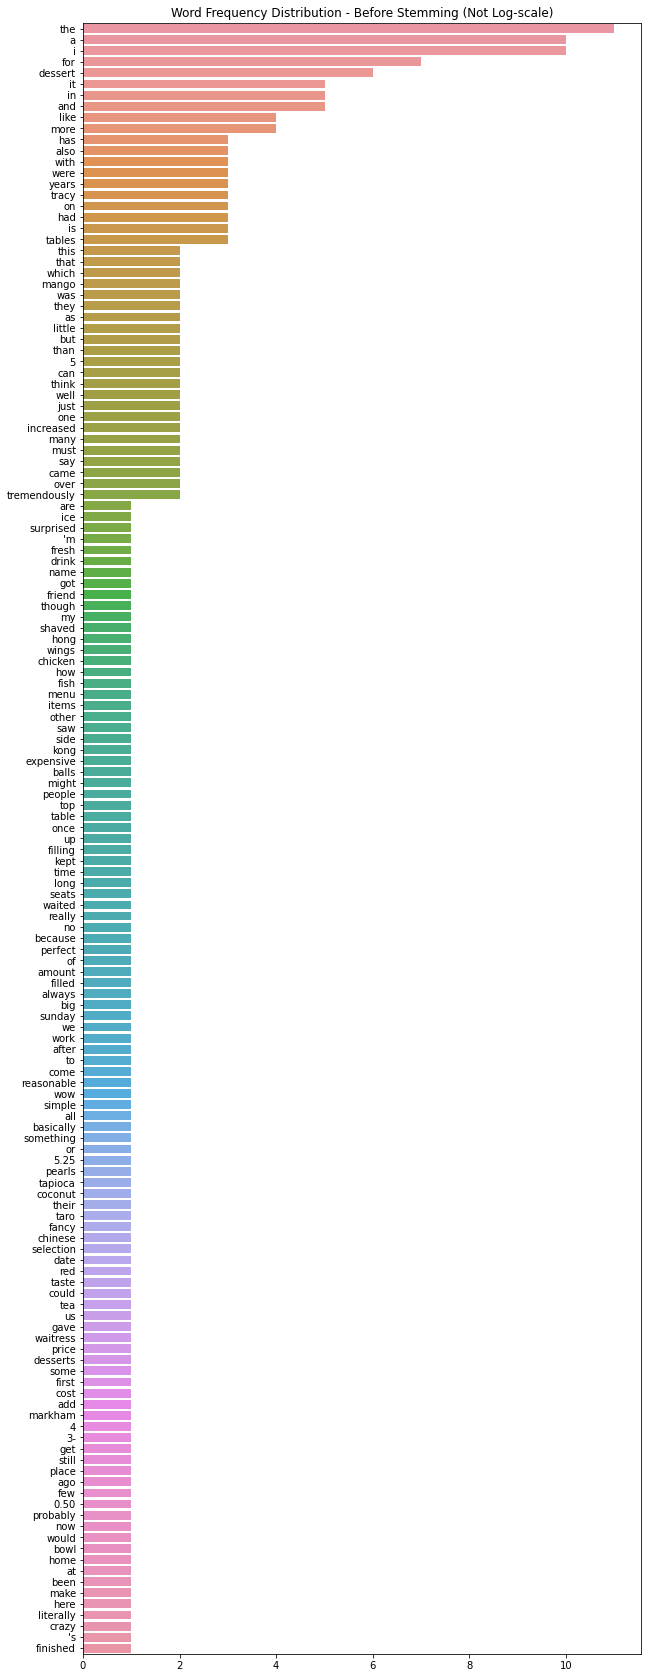

In [123]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=freq_dist.values, y=freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - Before Stemming (Not Log-scale)")
plt.show()

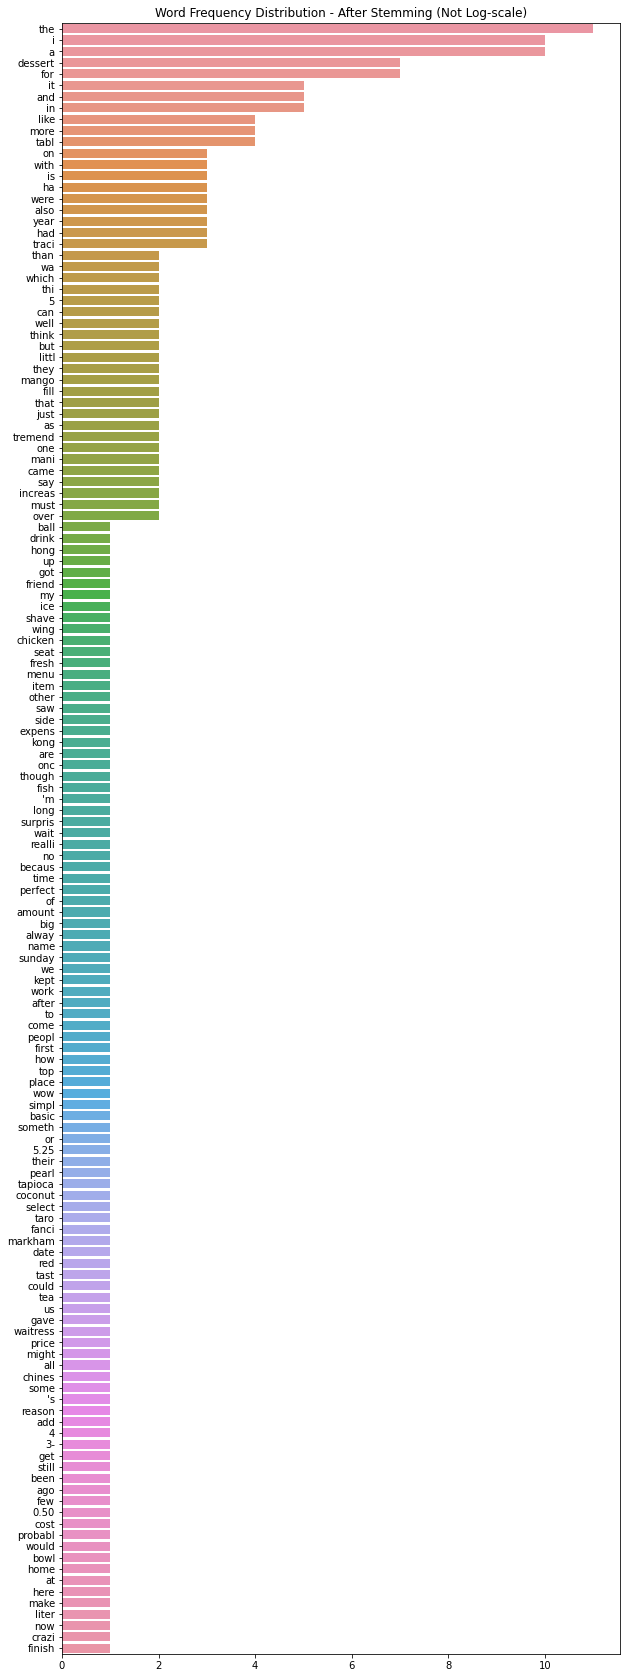

In [124]:
fig, ax = plt.subplots(figsize=(10,30))
sns.barplot(x=stemmed_freq_dist.values, y=stemmed_freq_dist.index, ax=ax)
plt.title("Word Frequency Distribution - After Stemming (Not Log-scale)")
plt.show()

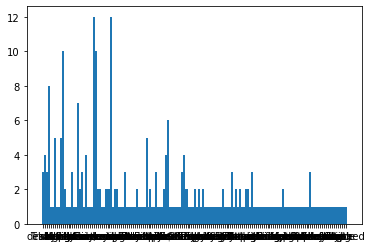

In [78]:
counts = Counter(preStem).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

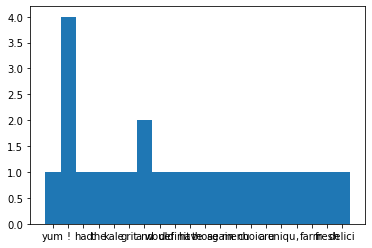

In [23]:
counts = Counter(stems).items()
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [28]:
i = randrange(len(data))
preStem_2 = []
stems_2 = []
business_id = data[i]['business_id']
for j in range(len(data)):
    if(data[j]['business_id'] == business_id):
        print(data[i]['text'])
        words = word_tokenize(str(data[i]['text']))
        for w in words:
            if(w != "," and w != "." and w != "a" and w != "the" and w != "of" and w != "and"):
                preStem_2.append(w)
                print(w, " : ", ps.stem(w))
            if(ps.stem(w) != "," and ps.stem(w) != "." and ps.stem(w) != "a" and ps.stem(w) != "the" and ps.stem(w) != "of" and ps.stem(w) != "and"):
                stems_2.append(ps.stem(w))

I tried this place because my girls are away for a month, and I REALLY wanted to try to wait until they came back, because NOBODY can hold a candle to them, but my toes were desperate.  When I went in, they were almost twice what I usually pay to begin with.  Then, before starting the pedicure, I specifically told them I already had gel polish on my toes.  They didn't tell me right then and there "that will be an extra $5'.  No, they waited until it was time to pay, and not only charged me for that, but they charged me all kinds of extra fees that I didn't even ask for!  I had also informed the girl that my toenail was loose and needed gluing.  While I was looking at my phone, all of a sudden I felt this sensation, and she RIPPED OFF MY TOENAIL!!!!  Without even asking me!!!!!!  So then she had another girl come and put acrylic on there since the nail underneath was only 1/2 grown.  Again, they didn't tell me how much this would be, or even ask my permission, they just charged me at th

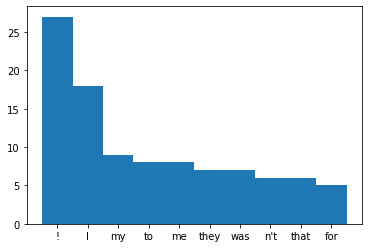

In [29]:
counts = Counter(preStem_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

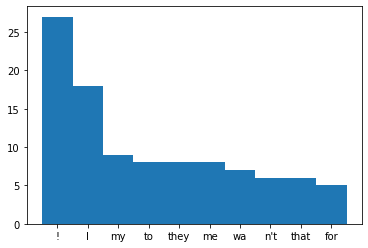

In [30]:
counts = Counter(stems_2).most_common(10)
labels, values = zip(*counts)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes,values,width)
plt.xticks(indexes ,labels)
plt.show()

In [27]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
tweet = "hello        ,".translate(str.maketrans('', '', string.punctuation))
ps.stem(tweet)

'hello        '

In [48]:
'!' in string.punctuation

True